In [2]:
# !pip install Basemap

In [3]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# 데이터 전처리

**2000-2021년 6-10월 데이터**

In [5]:
path = '/content/gdrive/My Drive/hot/1year/'
File_list = glob.glob(os.path.join(path, 'OBS*.csv'))
# print(File_list)

allData = [] # 읽어 들인 excel파일 내용을 저장할 빈 리스트를 하나 만든다
for file in File_list:
    df = pd.read_csv(file,encoding='CP949') # for구문으로 excel파일들을 읽어 들인다
    allData.append(df)
data = pd.concat(allData, axis=0, ignore_index=True).sort_values(['지점명','일시'])
data['지점명'] = data['지점명'].str.strip()

data

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간풍속 시각(hhmi),평균 풍속(m/s),최대 순간 풍속 풍향(deg)
1490298,303,가거도,2001-06-01,19.6,16.8,59.0,22.2,1010.0,0.0,11.0,2210.0,2.2,228.0
1490299,303,가거도,2001-06-02,20.2,17.5,2148.0,22.7,1213.0,0.0,12.3,1408.0,2.1,281.0
1490300,303,가거도,2001-06-03,20.7,19.0,2338.0,23.6,1324.0,0.0,12.7,2111.0,2.3,314.0
1490301,303,가거도,2001-06-04,18.8,17.0,2016.0,21.3,1237.0,0.0,9.4,44.0,0.8,289.0
1490302,303,가거도,2001-06-05,16.9,15.8,1647.0,19.7,1.0,10.0,12.5,1850.0,1.9,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17798,536,횡성,2021-10-27,10.5,4.2,2358.0,19.9,1329.0,0.0,6.8,1538.0,1.0,213.8
17799,536,횡성,2021-10-28,8.9,0.8,620.0,19.5,1447.0,0.0,3.4,1308.0,0.8,213.8
17800,536,횡성,2021-10-29,10.3,3.8,624.0,19.7,1522.0,0.0,4.3,1051.0,0.9,19.7
17801,536,횡성,2021-10-30,9.8,5.4,652.0,17.9,1302.0,0.0,3.7,1525.0,0.7,205.3


**2000년부터 존재하는 지점만 추출**

In [6]:
path = '/content/gdrive/My Drive/hot/1year/'
dat = pd.read_csv(path+'OBS_AWS_DD_20220316142920.csv',encoding='CP949')
#dat.drop(data.columns[0],inplace=True,axis=1)
dat['지점명'] = dat['지점명'].str.strip()
dat

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간풍속 시각(hhmi),평균 풍속(m/s),최대 순간 풍속 풍향(deg)
0,116,관악(레),2000-06-01,16.7,13.9,1.0,21.3,1348.0,0.0,7.1,1424.0,1.1,0.0
1,116,관악(레),2000-06-02,18.5,14.3,153.0,23.2,1313.0,0.0,7.1,1.0,0.5,298.8
2,116,관악(레),2000-06-03,21.5,16.6,555.0,27.3,1526.0,0.0,7.1,11.0,0.2,0.0
3,116,관악(레),2000-06-04,21.9,17.1,535.0,28.6,1610.0,0.0,9.0,42.0,0.1,0.0
4,116,관악(레),2000-06-05,21.6,18.8,2027.0,26.0,1355.0,0.0,11.1,2215.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57928,951,내장산,2000-10-28,11.0,6.8,28.0,16.0,1316.0,0.0,4.6,1345.0,0.2,297.6
57929,951,내장산,2000-10-29,9.1,4.4,2342.0,13.1,1407.0,1.0,5.4,1521.0,0.2,231.1
57930,951,내장산,2000-10-30,6.8,1.6,2359.0,15.8,1324.0,0.0,5.4,1418.0,0.3,271.6
57931,951,내장산,2000-10-31,8.8,0.9,505.0,16.7,1108.0,0.0,3.9,1004.0,0.2,124.5


In [7]:
dat = data[data['지점명'].isin(dat['지점명'].unique())].reset_index(drop=True)
dat

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간풍속 시각(hhmi),평균 풍속(m/s),최대 순간 풍속 풍향(deg)
0,647,가곡,2000-06-01,20.3,11.8,602.0,29.5,1403.0,0.0,5.3,1333.0,0.1,89.6
1,647,가곡,2000-06-02,21.8,15.1,436.0,28.3,1617.0,0.0,3.1,1327.0,0.2,183.0
2,647,가곡,2000-06-03,22.9,17.6,411.0,28.3,1429.0,0.0,5.8,1054.0,0.9,18.6
3,647,가곡,2000-06-04,22.0,14.7,531.0,31.1,1445.0,0.0,9.6,1346.0,1.1,60.4
4,647,가곡,2000-06-05,21.8,11.5,452.0,31.0,1425.0,0.0,7.5,1256.0,1.1,19.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286102,536,횡성,2021-10-27,10.5,4.2,2358.0,19.9,1329.0,0.0,6.8,1538.0,1.0,213.8
1286103,536,횡성,2021-10-28,8.9,0.8,620.0,19.5,1447.0,0.0,3.4,1308.0,0.8,213.8
1286104,536,횡성,2021-10-29,10.3,3.8,624.0,19.7,1522.0,0.0,4.3,1051.0,0.9,19.7
1286105,536,횡성,2021-10-30,9.8,5.4,652.0,17.9,1302.0,0.0,3.7,1525.0,0.7,205.3


In [8]:
len(dat['지점명'].unique())

387

In [9]:
new = dat[['지점명','일시','최고기온(°C)']]
print(len(new[new['최고기온(°C)'].isnull()]['일시'].unique()))
new

3028


,지점명,일시,최고기온(°C)
0,가곡,2000-06-01,29.5
1,가곡,2000-06-02,28.3
2,가곡,2000-06-03,28.3
3,가곡,2000-06-04,31.1
4,가곡,2000-06-05,31.0
...,...,...,...
1286102,횡성,2021-10-27,19.9
1286103,횡성,2021-10-28,19.5
1286104,횡성,2021-10-29,19.7
1286105,횡성,2021-10-30,17.9


**가장 최근에 측정시작한 위경도 추출**

In [10]:
meta = pd.read_csv(path+'../META_관측지점정보.csv',encoding='CP949')

meta = meta.sort_values(['지점명','시작일'])

meta = meta.drop_duplicates(subset='지점명', keep='last')[['지점명','위도','경도']].reset_index(drop=True)
meta

,지점명,위도,경도
0,13번국도(완도대교),34.3942,126.6468
1,309호선 학의JC남측,37.3892,127.0022
2,31번국도(어평재),37.1200,128.8800
3,322호선 전곡항입구,37.1911,126.6536
4,38번국도(나한정역),37.1983,128.0329
...,...,...,...
5182,흥해읍,36.1071,129.3417
5183,희망,37.6970,127.8888
5184,희천,40.1667,126.2500
5185,흰바우산,38.3115,127.7430


In [11]:
x = pd.merge(new,meta,on='지점명')
x

,지점명,일시,최고기온(°C),위도,경도
0,가곡,2000-06-01,29.5,36.1250,127.6924
1,가곡,2000-06-02,28.3,36.1250,127.6924
2,가곡,2000-06-03,28.3,36.1250,127.6924
3,가곡,2000-06-04,31.1,36.1250,127.6924
4,가곡,2000-06-05,31.0,36.1250,127.6924
...,...,...,...,...,...
1286102,횡성,2021-10-27,19.9,37.4876,127.9724
1286103,횡성,2021-10-28,19.5,37.4876,127.9724
1286104,횡성,2021-10-29,19.7,37.4876,127.9724
1286105,횡성,2021-10-30,17.9,37.4876,127.9724


In [17]:
# gd = x[x['일시']=='2000-09-05']
# gd

,지점명,일시,최고기온(°C),위도,경도
96,가곡,2000-09-05,29.5,36.1250,127.6924
3460,가덕,2000-09-05,28.7,36.5461,127.5239
6826,가덕도,2000-09-05,27.9,34.9931,128.8314
10172,가산,2000-09-05,30.7,37.8486,127.1864
13538,가평북면,2000-09-05,28.6,37.8981,127.5522
...,...,...,...,...,...
1269380,화천,2000-09-05,29.6,38.0964,127.7029
1272740,화촌,2000-09-05,29.7,37.7871,127.9838
1276106,황성,2000-09-05,26.7,35.8630,129.2093
1279472,황전,2000-09-05,29.9,35.1007,127.4274


# 지역별 이미지 저장




In [18]:
from mpl_toolkits.basemap import Basemap

for i in x['일시'].unique():
    gd = x[x['일시']==i]
    plt.figure(figsize=(10,10))
    map = Basemap(projection='merc', lat_0=37.35, lon_0=126.58, resolution = 'i',
            urcrnrlat=44, llcrnrlat=32, llcrnrlon=121.5, urcrnrlon=132.5)
        
    map.drawcoastlines()
    map.drawcountries()
    map.drawmapboundary()
    sc = map.scatter(gd['경도'], gd['위도'],40,gd['최고기온(°C)'],latlon=True,cmap='jet',marker='o')
    plt.colorbar(sc)
    plt.clim(10,40)
    # plt.savefig(path+'images/'+i+'.png', dpi=300)
    plt.close()

In [19]:
import os 
import cv2
path = '/content/gdrive/My Drive/hot/1year/'
files = glob.glob(os.path.join(path+'/images', '2000*.png'))
print(files)


# files = os.listdir(path)
png_img = []
for file in files:
    if '.png' in file: 
        f = cv2.imread(file)
        png_img.append(f)

['/content/gdrive/My Drive/hot/1year//images/2000-06-01.png', '/content/gdrive/My Drive/hot/1year//images/2000-06-02.png', '/content/gdrive/My Drive/hot/1year//images/2000-06-03.png', '/content/gdrive/My Drive/hot/1year//images/2000-06-04.png', '/content/gdrive/My Drive/hot/1year//images/2000-06-05.png', '/content/gdrive/My Drive/hot/1year//images/2000-06-06.png', '/content/gdrive/My Drive/hot/1year//images/2000-06-07.png', '/content/gdrive/My Drive/hot/1year//images/2000-06-08.png', '/content/gdrive/My Drive/hot/1year//images/2000-06-09.png', '/content/gdrive/My Drive/hot/1year//images/2000-06-10.png', '/content/gdrive/My Drive/hot/1year//images/2000-06-11.png', '/content/gdrive/My Drive/hot/1year//images/2000-06-12.png', '/content/gdrive/My Drive/hot/1year//images/2000-06-13.png', '/content/gdrive/My Drive/hot/1year//images/2000-06-14.png', '/content/gdrive/My Drive/hot/1year//images/2000-06-15.png', '/content/gdrive/My Drive/hot/1year//images/2000-06-16.png', '/content/gdrive/My Dri

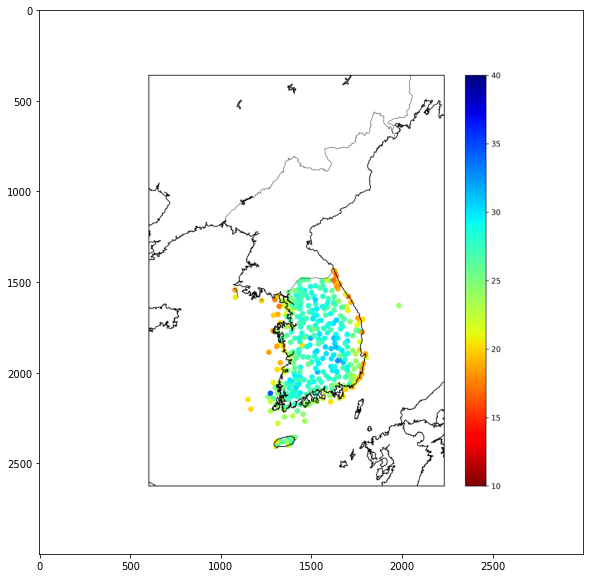

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(png_img[0])

In [21]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
K = 20
faces = faces_all.images[faces_all.target == K]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [22]:
faces[0].shape

(64, 64)

In [23]:
np.array(png_img).shape # rgb 이미지라 shape이 다름

(153, 3000, 3000, 3)

**이미지 축소**

In [24]:
res = []
for i in range(len(png_img)):

    re = cv2.resize(png_img[i], dsize=(420,420), interpolation=cv2.INTER_CUBIC)
    res.append(re)

In [25]:
np.array(res).shape 

(153, 420, 420, 3)